In [1]:
import pyreadr
import pandas as pd 
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime as dt
import datetime
import timeit

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn import metrics
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [2]:
data = pd.read_csv('loans_full_schema.csv')

In [3]:
data.shape

(10000, 55)

In [4]:
data.columns

Index(['emp_title', 'emp_length', 'state', 'homeownership', 'annual_income',
       'verified_income', 'debt_to_income', 'annual_income_joint',
       'verification_income_joint', 'debt_to_income_joint', 'delinq_2y',
       'months_since_last_delinq', 'earliest_credit_line',
       'inquiries_last_12m', 'total_credit_lines', 'open_credit_lines',
       'total_credit_limit', 'total_credit_utilized',
       'num_collections_last_12m', 'num_historical_failed_to_pay',
       'months_since_90d_late', 'current_accounts_delinq',
       'total_collection_amount_ever', 'current_installment_accounts',
       'accounts_opened_24m', 'months_since_last_credit_inquiry',
       'num_satisfactory_accounts', 'num_accounts_120d_past_due',
       'num_accounts_30d_past_due', 'num_active_debit_accounts',
       'total_debit_limit', 'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'tax_liens', 'public_record_bankr

In [5]:
data.dtypes

emp_title                            object
emp_length                          float64
state                                object
homeownership                        object
annual_income                       float64
verified_income                      object
debt_to_income                      float64
annual_income_joint                 float64
verification_income_joint            object
debt_to_income_joint                float64
delinq_2y                             int64
months_since_last_delinq            float64
earliest_credit_line                  int64
inquiries_last_12m                    int64
total_credit_lines                    int64
open_credit_lines                     int64
total_credit_limit                    int64
total_credit_utilized                 int64
num_collections_last_12m              int64
num_historical_failed_to_pay          int64
months_since_90d_late               float64
current_accounts_delinq               int64
total_collection_amount_ever    

In [6]:
data.head(5)

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [7]:
data.describe()

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,public_record_bankrupt,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
count,9183.000000,1.000000e+04,9976.000000,1.495000e+03,1495.000000,10000.00000,4342.000000,10000.00000,10000.00000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.930306,7.922215e+04,19.308192,1.279146e+05,19.979304,0.21600,36.760709,2001.29000,1.95820,22.679600,...,0.123800,16361.922500,43.272000,12.427524,476.205323,14458.916610,2494.234773,1894.448466,599.666781,0.119516
std,3.703734,6.473429e+04,15.004851,7.016838e+04,8.054781,0.68366,21.634939,7.79551,2.38013,11.885439,...,0.337172,10301.956759,11.029877,5.001105,294.851627,9964.561865,3958.230365,3884.407175,517.328062,1.813468
min,0.000000,0.000000e+00,0.000000,1.920000e+04,0.320000,0.00000,1.000000,1963.00000,0.00000,2.000000,...,0.000000,1000.000000,36.000000,5.310000,30.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.500000e+04,11.057500,8.683350e+04,14.160000,0.00000,19.000000,1997.00000,0.00000,14.000000,...,0.000000,8000.000000,36.000000,9.430000,256.040000,6679.065000,928.700000,587.100000,221.757500,0.000000
50%,6.000000,6.500000e+04,17.570000,1.130000e+05,19.720000,0.00000,34.000000,2003.00000,1.00000,21.000000,...,0.000000,14500.000000,36.000000,11.980000,398.420000,12379.495000,1563.300000,984.990000,446.140000,0.000000
75%,10.000000,9.500000e+04,25.002500,1.515455e+05,25.500000,0.00000,53.000000,2006.00000,3.00000,29.000000,...,0.000000,24000.000000,60.000000,15.050000,644.690000,20690.182500,2616.005000,1694.555000,825.420000,0.000000
max,10.000000,2.300000e+06,469.090000,1.100000e+06,39.980000,13.00000,118.000000,2015.00000,29.00000,87.000000,...,3.000000,40000.000000,60.000000,30.940000,1566.590000,40000.000000,41630.443684,40000.000000,4216.440000,52.980000


Explore the data and figure out issues

In [8]:
# explainatory analysis

# a function to generate basic info about the field, and examine the data records

def basic(field):
    display("# of Zeros:", data[field].isna().sum())
    print(" ")
    display("Uniqueness:", data[field].unique())
    display("# of Unique:", len(data[field].unique()))
    print(" ")
    display("value counts:", data[field].value_counts())
    print(" ")
    display("# of Records", data[field].shape[0] - data[field].isna().sum())

In [9]:
# examine data issue - missing
# find out no. of records with 0 and the percentage of such records

def zero(field):
    display("# of Zeros:", data[field].isna().sum())
    print(" ")
    display("% of Zeros:", data[field].isna().sum()/data[field].shape[0])
    
field = data.columns
zero(field = field)


'# of Zeros:'

emp_title                            833
emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
annual_income_joint                 8505
verification_income_joint           8545
debt_to_income_joint                8505
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_

'% of Zeros:'

emp_title                           0.0833
emp_length                          0.0817
state                               0.0000
homeownership                       0.0000
annual_income                       0.0000
verified_income                     0.0000
debt_to_income                      0.0024
annual_income_joint                 0.8505
verification_income_joint           0.8545
debt_to_income_joint                0.8505
delinq_2y                           0.0000
months_since_last_delinq            0.5658
earliest_credit_line                0.0000
inquiries_last_12m                  0.0000
total_credit_lines                  0.0000
open_credit_lines                   0.0000
total_credit_limit                  0.0000
total_credit_utilized               0.0000
num_collections_last_12m            0.0000
num_historical_failed_to_pay        0.0000
months_since_90d_late               0.7715
current_accounts_delinq             0.0000
total_collection_amount_ever        0.0000
current_ins

Missing information:

The data has significantly missing information on below aspects, we will drop the columns with more than 50% records missing. Even if we try to fill in the information, it may not be accurate as the majority is missing. 
1. Employment information - employment title and length both have around 800 records missing, but the missing rate is not that high. 
2. Joint application - for joint applications, there are 3 columns indicating the annual_income, verification_income and debt_to_income. These 3 columns are basically empty. As the missing percentage is above 85%, we will drop these columns before modeling. 
3. Recency, months_since_last_delinq, months_since_90d_late,these 2 columns also see significant missing. We will also drop them. 
4. debt_to_income, months_since_last_credit_inquiry, num_accounts_120d_past_due, these 3 columns' missing is not as much as joint applications'. Therefore we will try to fill in the missing information. 

In [10]:
# Drop columns with too many missing records(missing > 50%)

data = data.drop(columns = ['annual_income_joint', 'verification_income_joint', 'debt_to_income_joint','months_since_90d_late', 'months_since_last_delinq'])

In [11]:
# Fill in missing information 

# Filling In Missing debt_to_income, months_since_last_credit_inquiry, and num_accounts_120d_past_due
# calculate groupwise average. First replace the 0’s and 1’s by NAs so they are not counted in calculating mean.

data.loc[data['debt_to_income']==0,'debt_to_income']=np.nan
data.loc[data['months_since_last_credit_inquiry']==0,'months_since_last_credit_inquiry']=np.nan
data.loc[data['num_accounts_120d_past_due']==0,'num_accounts_120d_past_due']=np.nan

# calculate the mean now (mean function ignores NAs but not 0s hence we converted 0 to NA)
mean_debt_to_income = data['debt_to_income'].mean()
mean_months_since_last_credit_inquiry = data['months_since_last_credit_inquiry'].mean()
mean_num_accounts_120d_past_due= data['num_accounts_120d_past_due'].mean()

# impute values
data.loc[(data['debt_to_income'].isnull()),'debt_to_income']=mean_debt_to_income   
data.loc[(data['months_since_last_credit_inquiry'].isnull()),'months_since_last_credit_inquiry']=mean_months_since_last_credit_inquiry
data.loc[(data['num_accounts_120d_past_due'].isnull()),'num_accounts_120d_past_due']=mean_num_accounts_120d_past_due
    
data["emp_length"] = data["emp_length"].fillna(data["emp_length"].mean())

In [12]:
# examine data issue - duplication 

data[data.duplicated()].count()

emp_title                           0
emp_length                          0
state                               0
homeownership                       0
annual_income                       0
verified_income                     0
debt_to_income                      0
delinq_2y                           0
earliest_credit_line                0
inquiries_last_12m                  0
total_credit_lines                  0
open_credit_lines                   0
total_credit_limit                  0
total_credit_utilized               0
num_collections_last_12m            0
num_historical_failed_to_pay        0
current_accounts_delinq             0
total_collection_amount_ever        0
current_installment_accounts        0
accounts_opened_24m                 0
months_since_last_credit_inquiry    0
num_satisfactory_accounts           0
num_accounts_120d_past_due          0
num_accounts_30d_past_due           0
num_active_debit_accounts           0
total_debit_limit                   0
num_total_cc

No duplicated records found. 

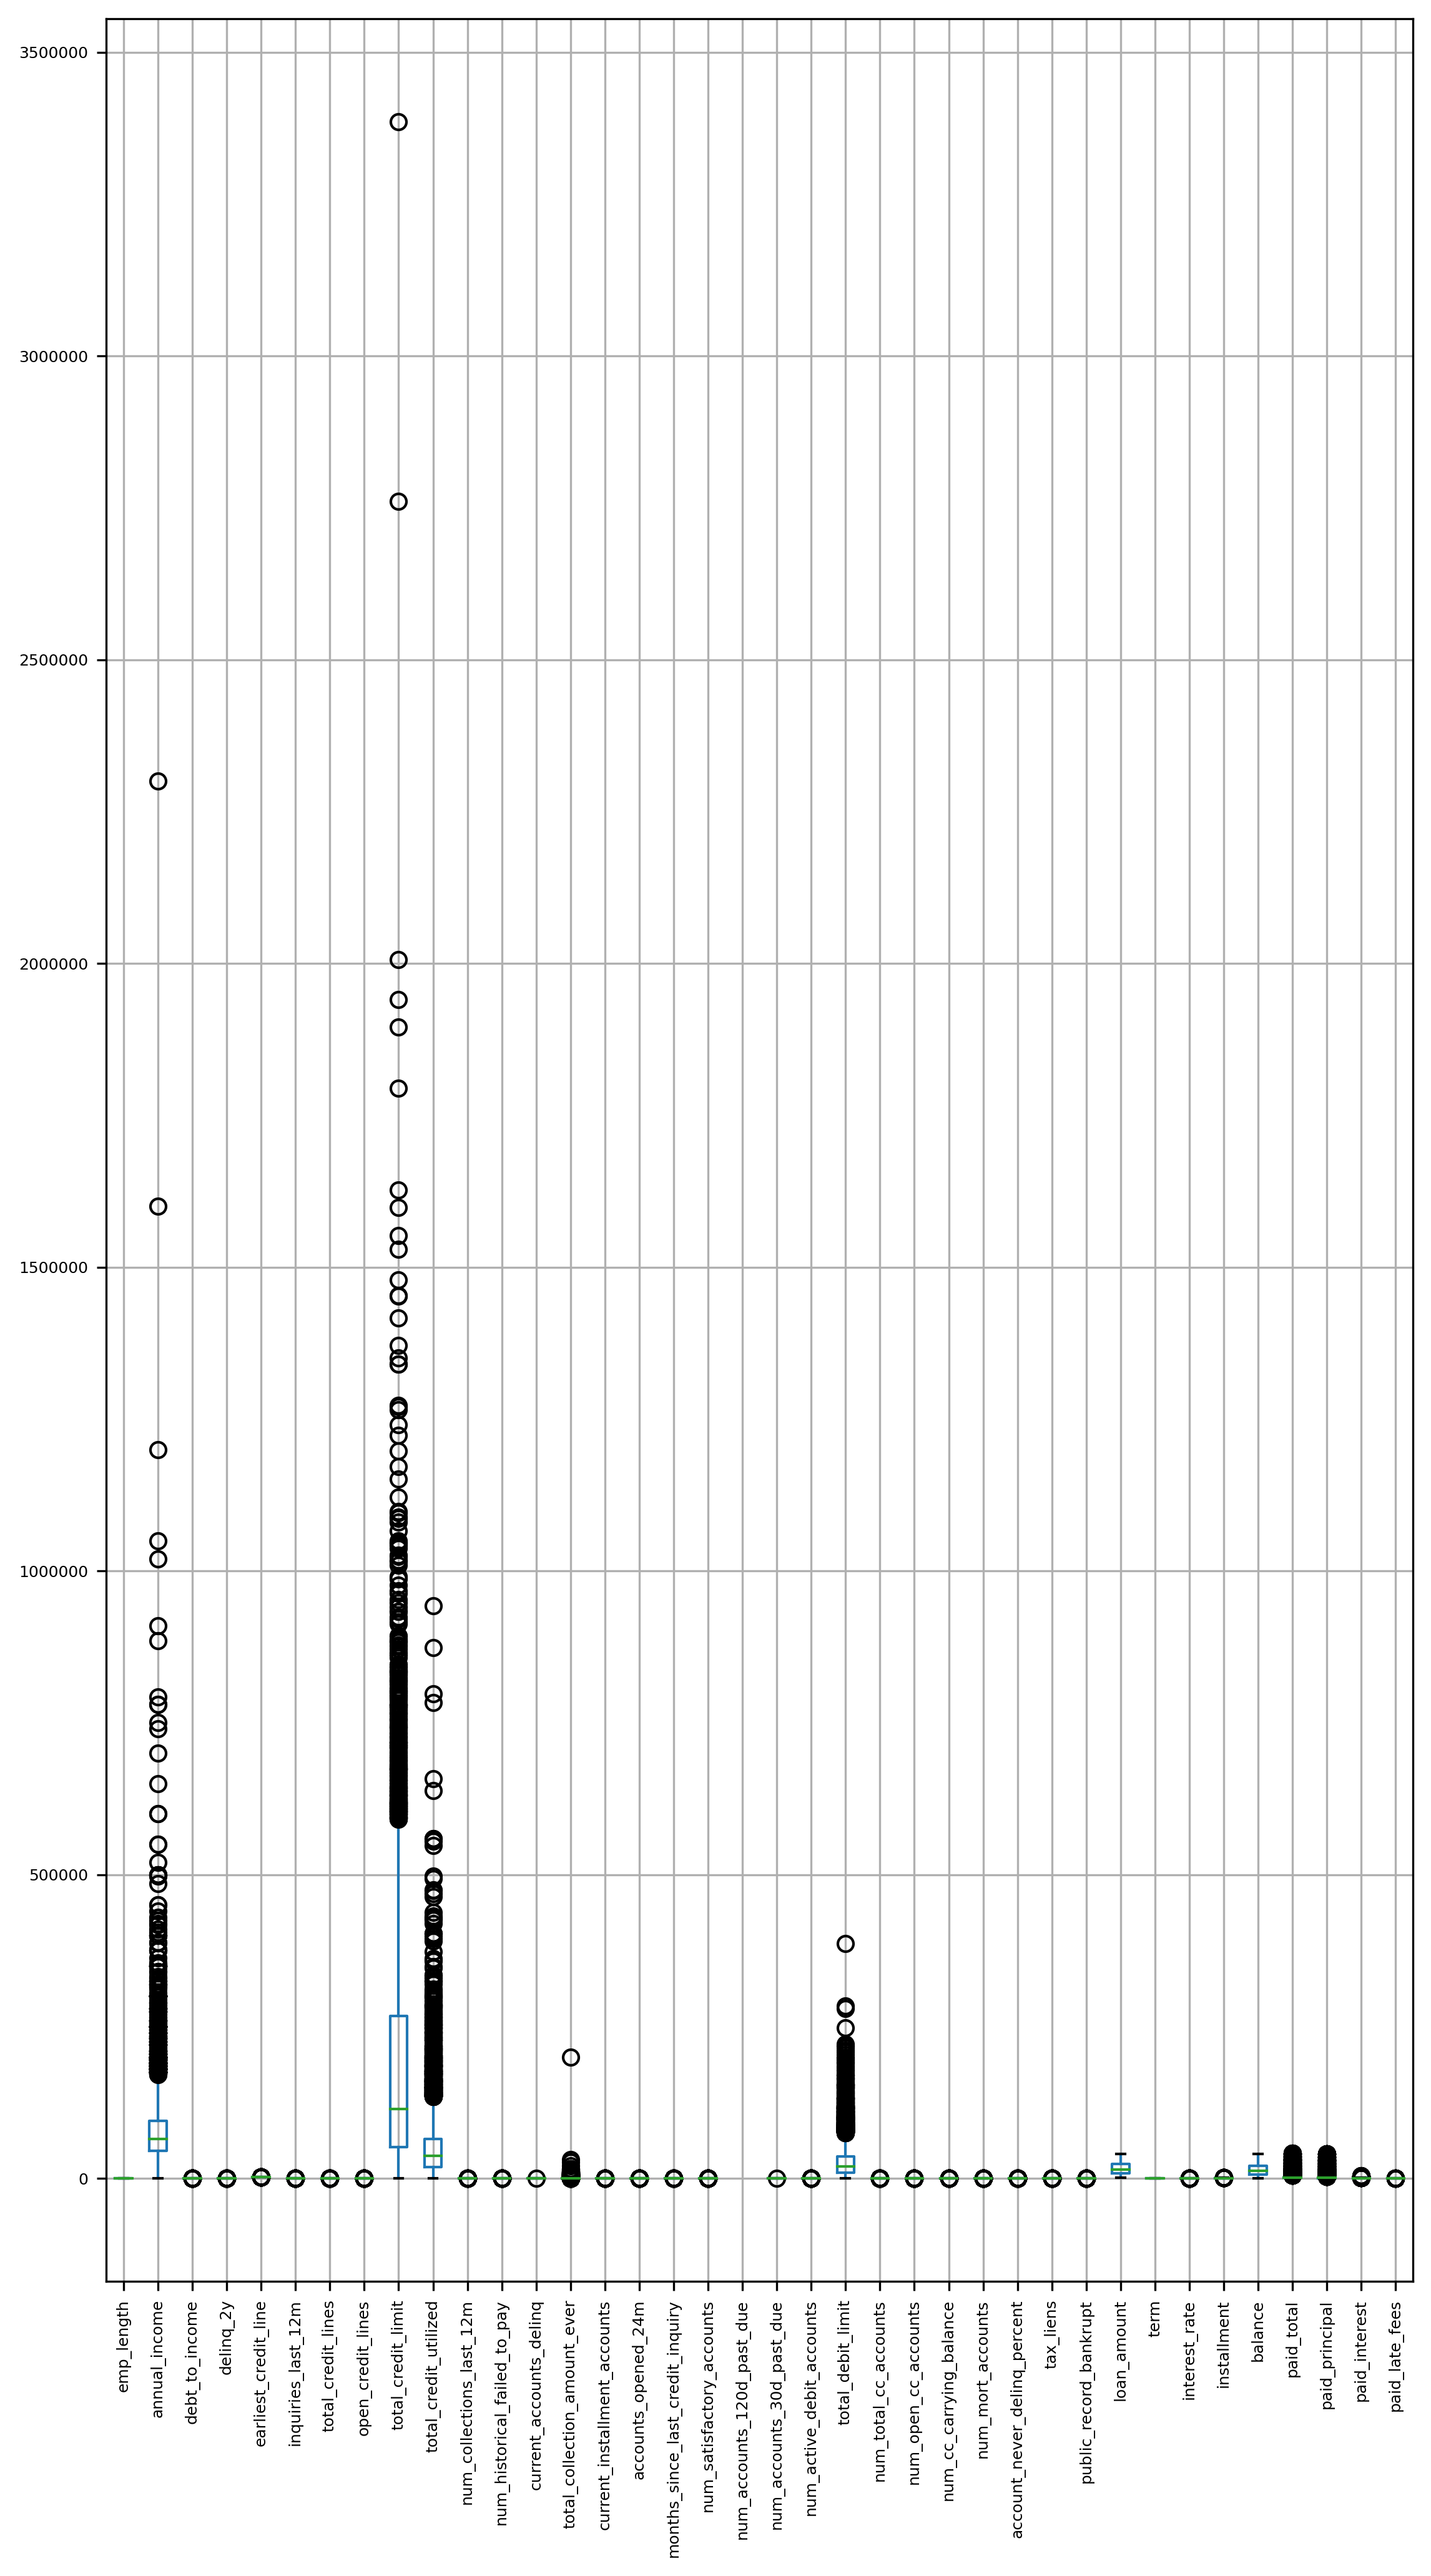

In [13]:
# examine data issue - outlier 

plt.figure(figsize=(9, 16), dpi=300)
data.boxplot(fontsize=6)
plt.ticklabel_format(axis='y', style='plain')
plt.xticks(rotation=90)
plt.show()

We can see from the chart that:
Annual_income,total_credit_limit,total_credit_utilized,total_collection_amount_ever,total_debit_limit have outliers. But all these factors indicate the general financial habits and economic status - income level, credit score, credit card usage, etc. All these factors naturally tend to have outliers as they vary from customer to customer, therefore we consider these outliers acceptable and won't exclude them. 

In [14]:
# transform data type 
# transform all object into string, but time into datetime

entities = ["emp_title","state","verified_income","loan_purpose","application_type","grade","sub_grade","loan_status","initial_listing_status","disbursement_method","verified_income","homeownership","state"]
data[entities] = data[entities].astype("str")

data['issue_month']=pd.to_datetime(data['issue_month'])

Data visualisation and analysis

'# of Zeros:'

0

'Uniqueness:'

array([1999.33,  499.12,  281.8 , ..., 4620.8 , 2873.31, 1658.56])

'# of Unique:'

7475

'value counts:'

0.000000        15
935.120000      12
1519.570000     12
1122.150000     11
1214.980000     10
                ..
1219.860000      1
5550.000000      1
24988.248867     1
12004.912833     1
1951.780000      1
Name: paid_total, Length: 7475, dtype: int64

'# of Records'

10000

[Text(0, 0, '0.0'),
 Text(1, 0, '935.12'),
 Text(2, 0, '1519.57'),
 Text(3, 0, '1122.15'),
 Text(4, 0, '1214.98'),
 Text(5, 0, '576.83'),
 Text(6, 0, '1595.01'),
 Text(7, 0, '1292.81'),
 Text(8, 0, '968.05'),
 Text(9, 0, '1274.96'),
 Text(10, 0, '1248.49'),
 Text(11, 0, '1226.27'),
 Text(12, 0, '4806.58'),
 Text(13, 0, '1561.72'),
 Text(14, 0, '2409.32'),
 Text(15, 0, '918.62'),
 Text(16, 0, '1703.03'),
 Text(17, 0, '1547.82'),
 Text(18, 0, '1379.24'),
 Text(19, 0, '1201.64'),
 Text(20, 0, '1351.61'),
 Text(21, 0, '926.91'),
 Text(22, 0, '914.73'),
 Text(23, 0, '1368.0'),
 Text(24, 0, '3257.53'),
 Text(25, 0, '1653.84'),
 Text(26, 0, '900.38'),
 Text(27, 0, '1978.99'),
 Text(28, 0, '1800.73'),
 Text(29, 0, '974.7')]

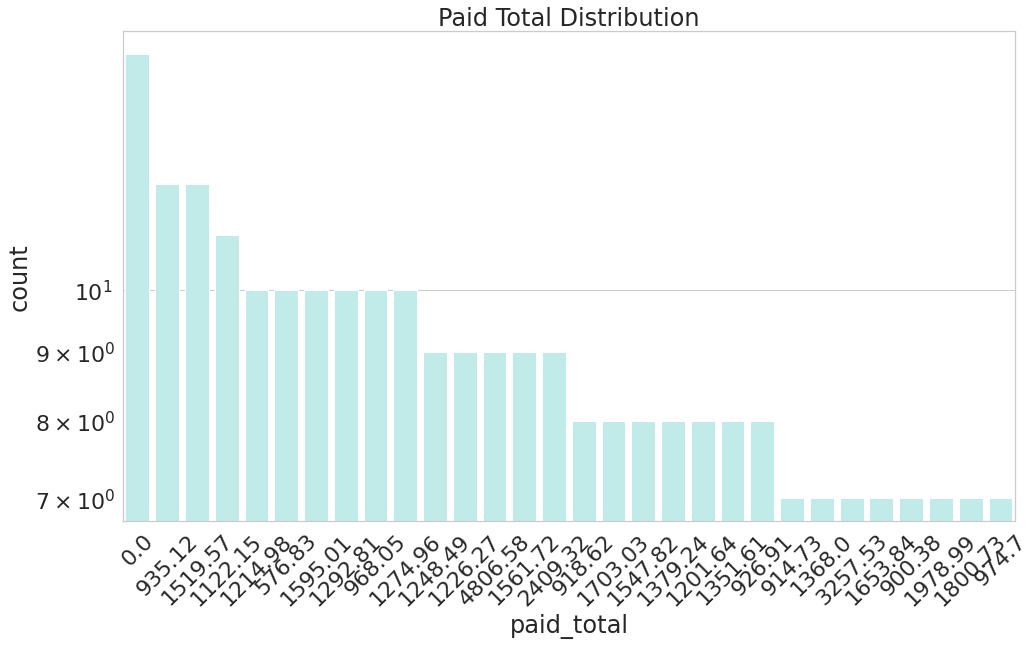

In [15]:
# Visualisation - revenue - paid total

field = 'paid_total'
basic(field = field)

# plot to see distribution
plt.rcParams["figure.figsize"] = [16,9]
sns.set(font_scale = 2, style='whitegrid')

colors = sns.color_palette('pastel')[9]

plot = sns.countplot(x=field, 
                     data=data, 
                     order=data[field].value_counts().iloc[:30].index, 
                     color=colors)

plot.set_yscale('log')

plot.set_title('Paid Total Top30')

plot.set_xticklabels(plot.get_xticklabels(),rotation=45)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


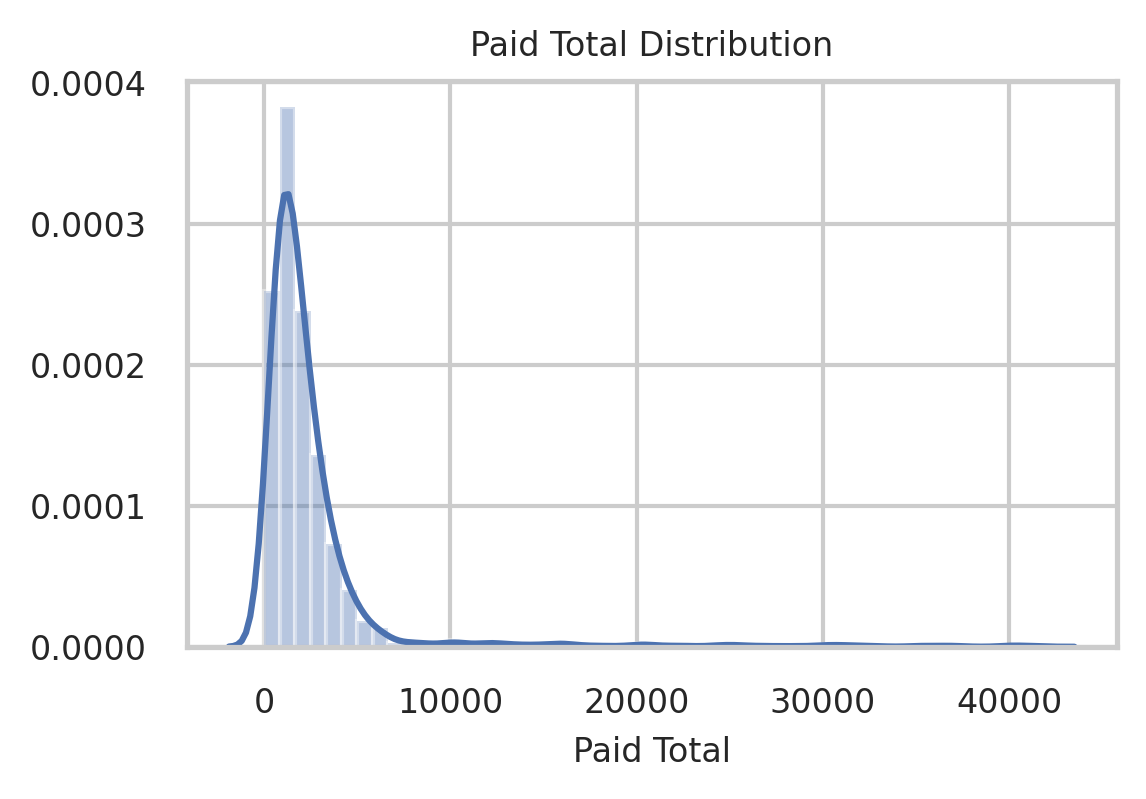

In [36]:
#paid_total_distribution

plt.figure(figsize=(4, 2.5), dpi=300)
plt.tick_params(labelsize=8)
sns.distplot(data["paid_total"])
plt.title("Paid Total Distribution",fontsize=8)
plt.xlabel("Paid Total", fontsize=8)
plt.ylabel("")
plt.show()

'# of Zeros:'

0

'Uniqueness:'

array([1015.19,  150.49,  106.43, ...,  119.46, 2238.45,  433.39])

'# of Unique:'

7422

'value counts:'

0.00       18
237.02     12
189.66     12
227.58     11
297.97     10
           ..
449.19      1
879.68      1
336.64      1
314.71      1
2159.91     1
Name: paid_interest, Length: 7422, dtype: int64

'# of Records'

10000

[Text(0, 0, '0.0'),
 Text(1, 0, '237.02'),
 Text(2, 0, '189.66'),
 Text(3, 0, '227.58'),
 Text(4, 0, '297.97'),
 Text(5, 0, '167.52'),
 Text(6, 0, '141.91'),
 Text(7, 0, '191.54'),
 Text(8, 0, '248.26'),
 Text(9, 0, '368.95'),
 Text(10, 0, '329.08'),
 Text(11, 0, '251.36'),
 Text(12, 0, '670.11'),
 Text(13, 0, '311.15'),
 Text(14, 0, '552.15'),
 Text(15, 0, '926.9'),
 Text(16, 0, '174.84'),
 Text(17, 0, '300.96'),
 Text(18, 0, '286.82'),
 Text(19, 0, '159.79'),
 Text(20, 0, '211.79'),
 Text(21, 0, '251.29'),
 Text(22, 0, '252.77'),
 Text(23, 0, '324.24'),
 Text(24, 0, '157.36'),
 Text(25, 0, '216.77'),
 Text(26, 0, '189.5'),
 Text(27, 0, '126.39'),
 Text(28, 0, '614.05'),
 Text(29, 0, '571.73')]

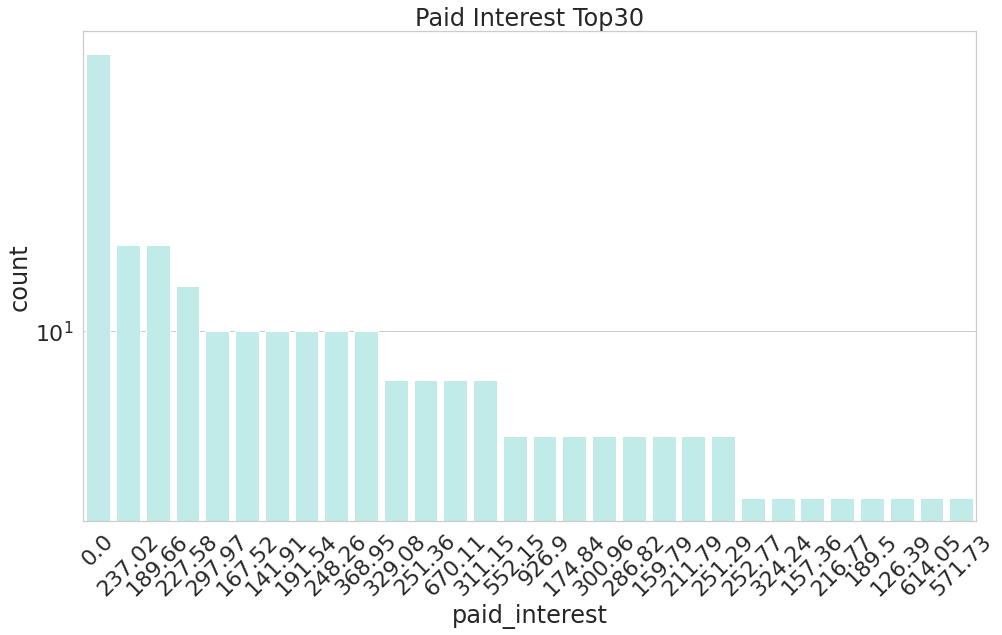

In [33]:
# revenue - paid interest

field = 'paid_interest'
basic(field = field)

# plot to see distribution

plt.rcParams["figure.figsize"] = [16,9]
sns.set(font_scale = 2, style='whitegrid')

colors = sns.color_palette('pastel')[9]

plot = sns.countplot(x=field, 
                     data=data, 
                     order=data[field].value_counts().iloc[:30].index, 
                     color=colors)

plot.set_yscale('log')
plot.set_title('Paid Interest Top30')
plot.set_xticklabels(plot.get_xticklabels(),rotation=45)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


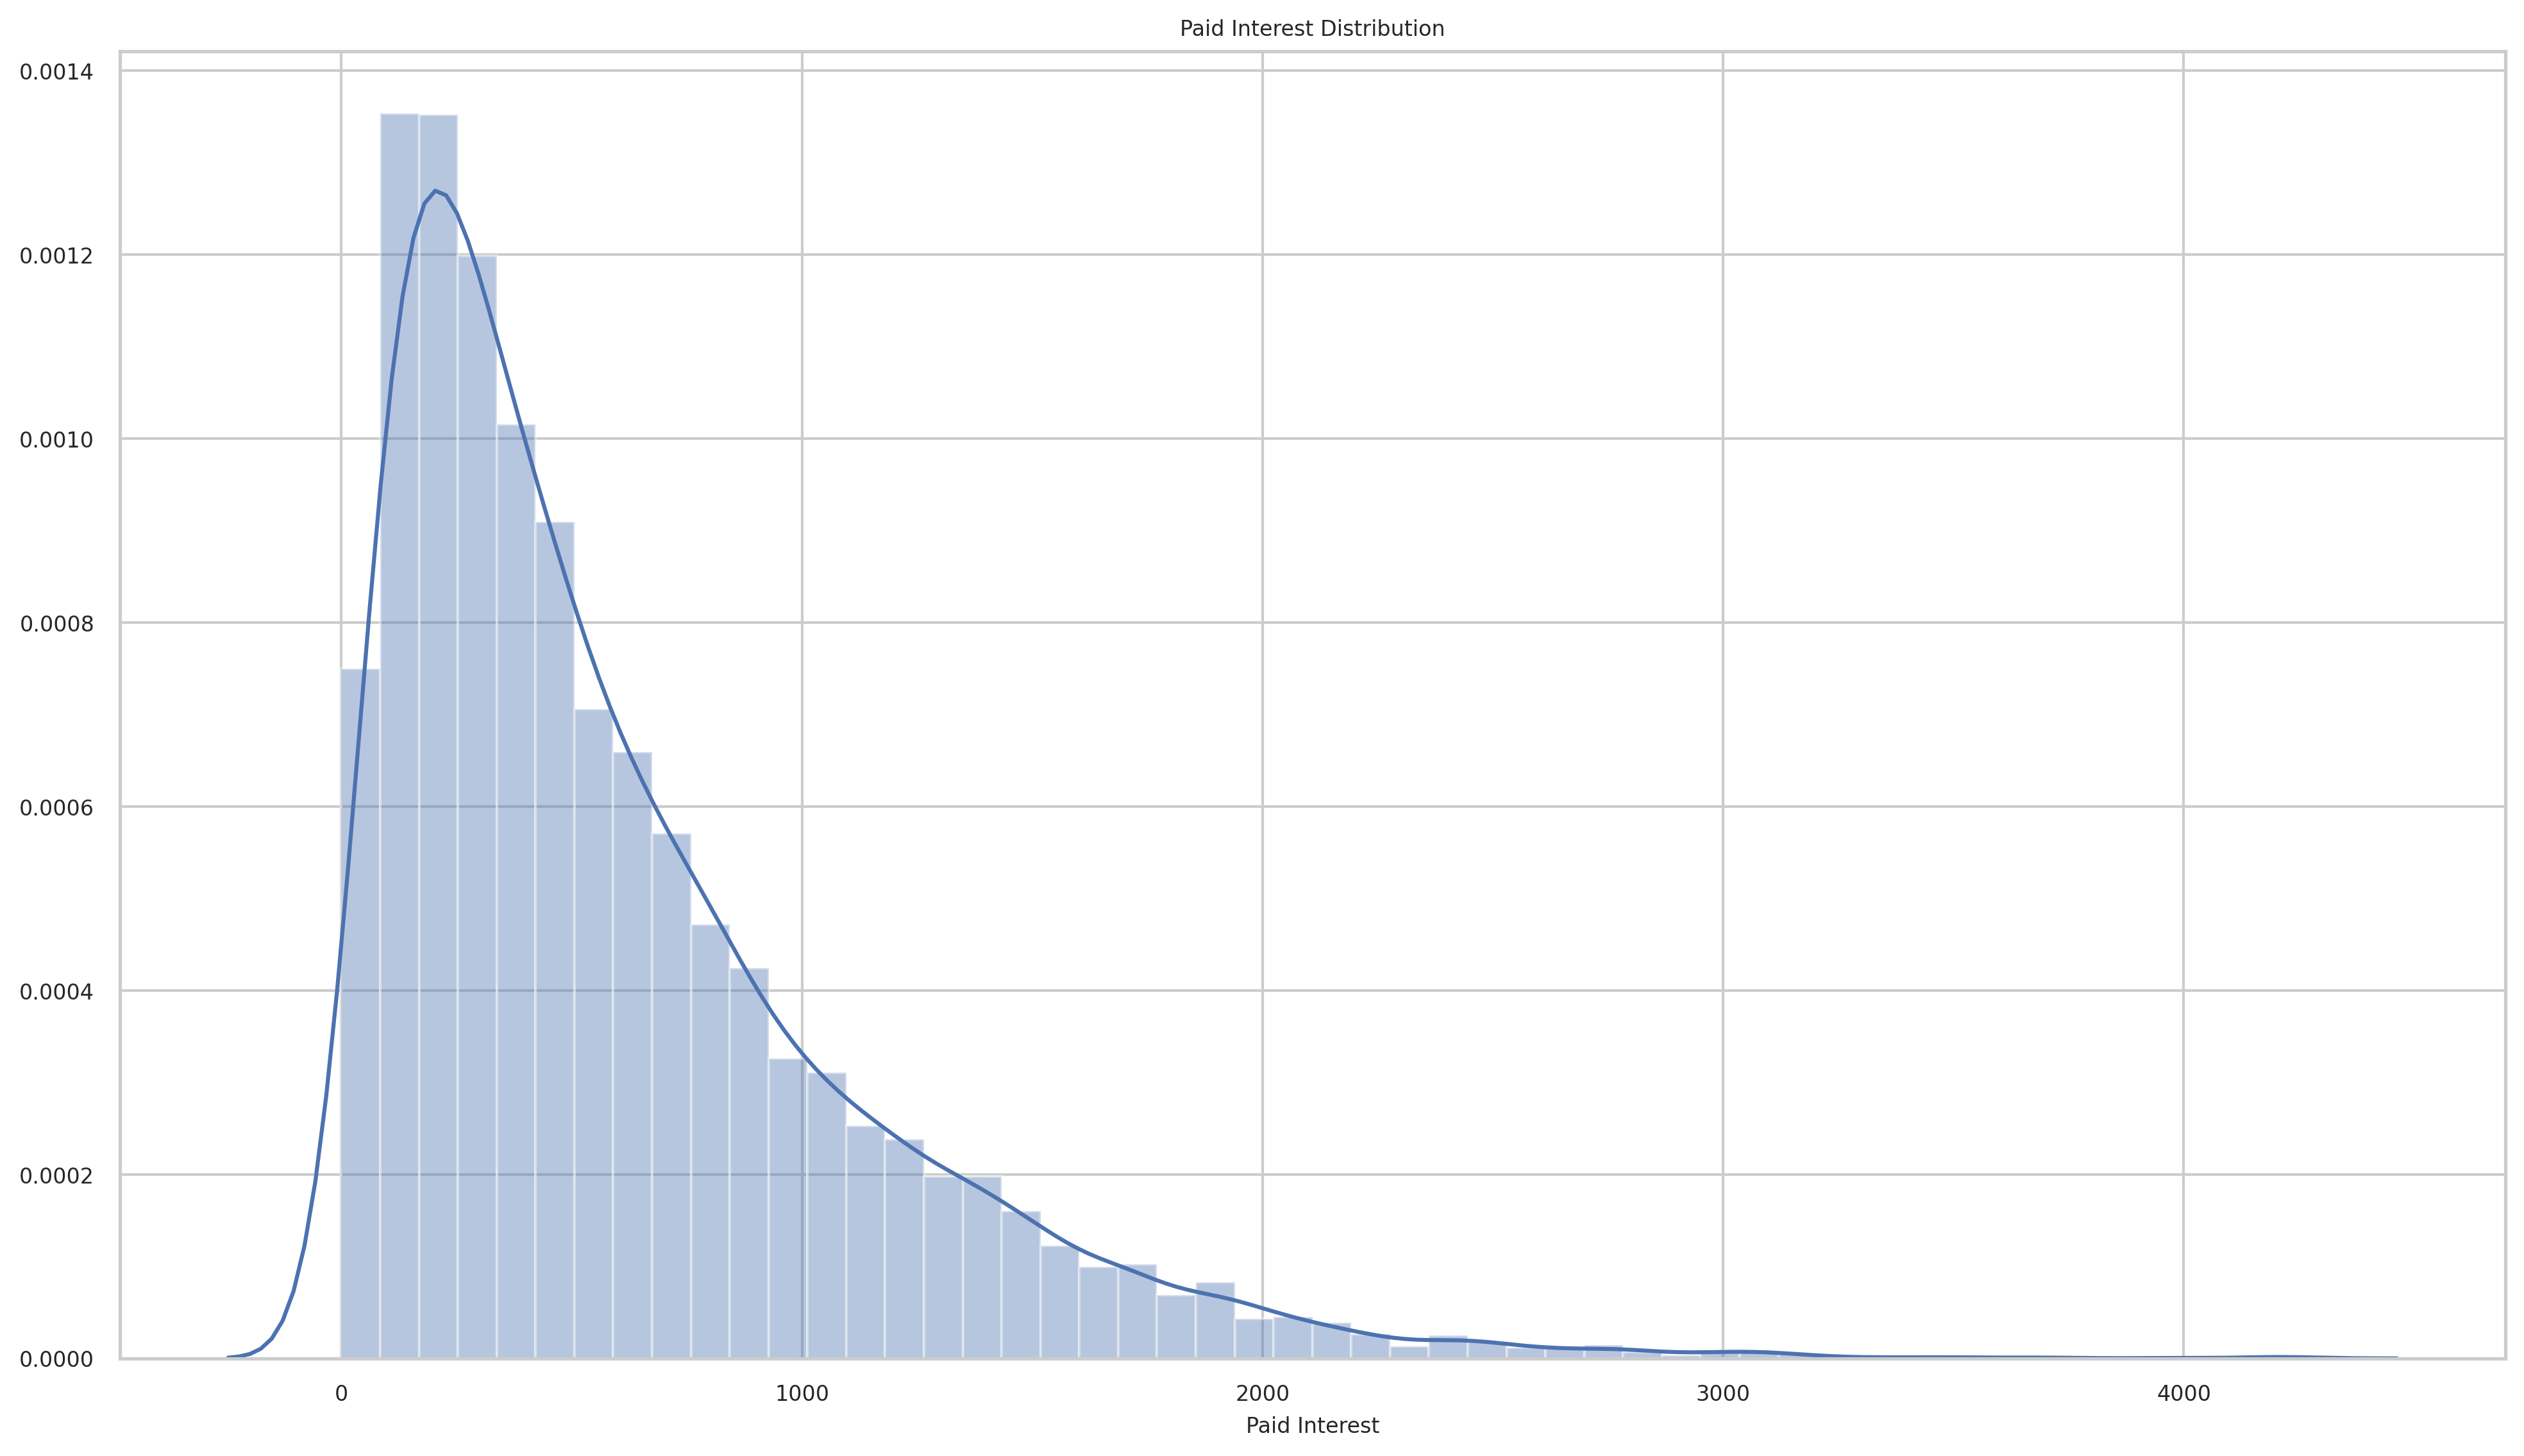

In [34]:
# paid-interest distribution

plt.figure(figsize=(16, 9), dpi=300)
plt.tick_params(labelsize=8)
sns.distplot(data["paid_interest"])
plt.title("Paid Interest Distribution",fontsize=8)
plt.xlabel("Paid Interest", fontsize=8)
plt.ylabel("")
plt.show()

Revenue analysis: 
Most paid_totals are 0, which indicates that, either most of the loans have just been released, or we are missing information. Here we selected top 30 paid totals, most of them share a range of [900, 1600].
Similarly, most paid interests are 0 as loans were just released or missing information. Among top 30 paid interests, most of them share a range of 
Both paid total and interest are significantly skewed, the frequency decreases as the amount increases, which means smaller amount loans and interests are m

<AxesSubplot:title={'center':'Paid-Total Each Month'}, xlabel='issue_month'>

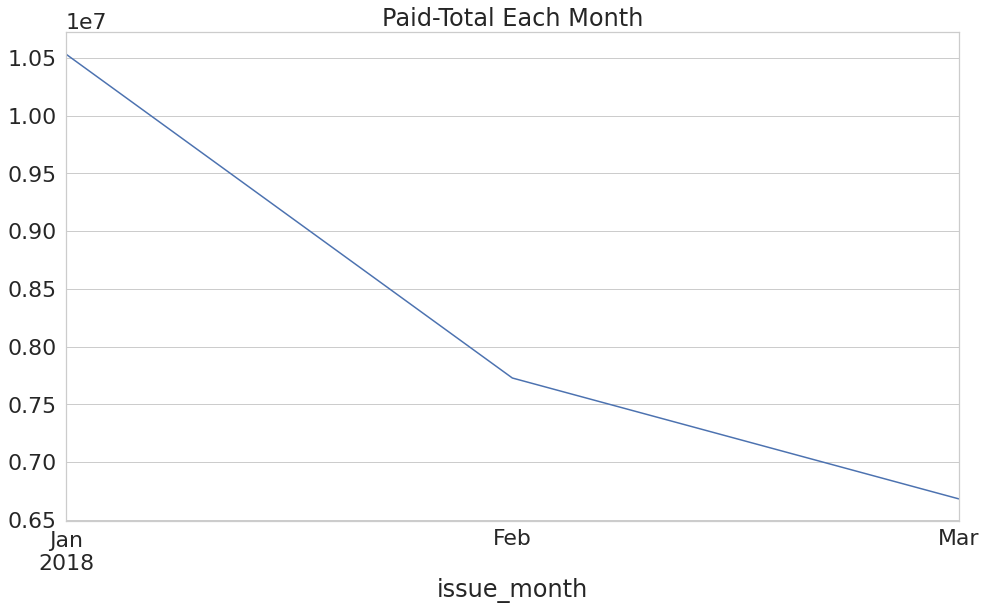

In [17]:
# loan issue distributed by time

data.groupby('issue_month')['paid_total'].sum().plot(title='Paid-Total Each Month',kind='line',figsize=[16,9])

'# of Zeros:'

0

'Uniqueness:'

array(['NJ', 'HI', 'WI', 'PA', 'CA', 'KY', 'MI', 'AZ', 'NV', 'IL', 'FL',
       'SC', 'CO', 'TN', 'TX', 'VA', 'NY', 'GA', 'MO', 'AR', 'MD', 'NC',
       'NE', 'WV', 'NH', 'UT', 'DE', 'MA', 'OR', 'OH', 'OK', 'SD', 'MN',
       'AL', 'WY', 'LA', 'IN', 'KS', 'MS', 'WA', 'ME', 'VT', 'CT', 'NM',
       'AK', 'MT', 'RI', 'ND', 'DC', 'ID'], dtype=object)

'# of Unique:'

50

'value counts:'

CA    1330
TX     806
NY     793
FL     732
IL     382
NJ     338
OH     338
GA     334
NC     299
PA     298
VA     261
AZ     255
MD     247
MI     245
MA     237
WA     235
CO     235
CT     181
IN     178
TN     167
MN     159
MO     159
NV     158
SC     145
OR     130
WI     128
AL     122
KY      97
LA      96
KS      89
OK      81
MS      72
AR      70
WV      68
UT      61
NE      56
RI      53
NH      47
NM      43
ID      38
HI      35
AK      33
ME      26
MT      24
DE      24
VT      23
SD      20
WY      19
DC      19
ND      14
Name: state, dtype: int64

'# of Records'

10000

<AxesSubplot:title={'center':'Paid-Total by State'}, ylabel='paid_total'>

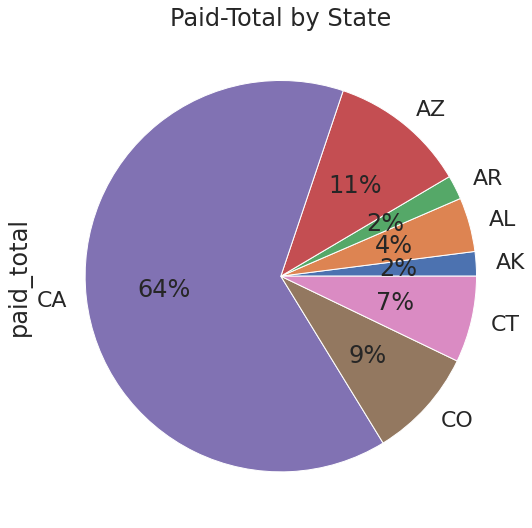

In [18]:
# revenue geographic distribution - paid-total & paid-interest distributed by state

field = 'state'
basic(field = field)

#plot 

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
data.groupby('state')['paid_total'].sum().head(7).plot(title='Paid-Total by State',kind='pie',figsize=[16,9], autopct='%.0f%%')

<AxesSubplot:title={'center':'Paid-Interest by State'}, ylabel='paid_interest'>

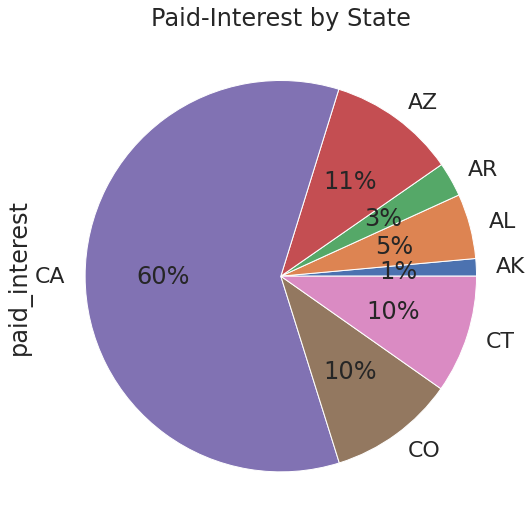

In [19]:
data.groupby('state')['paid_interest'].sum().head(7).plot(title='Paid-Interest by State',kind='pie',figsize=[16,9], autopct='%.0f%%')

The source of paid_total and paid_interest highly overlap with each other. Most of our revenue comes from loan in CA, AZ, CO, CT these 4 states. 
Possible Reasons: more loan applicants from these states; larger loan amount or higher interest rate.
Suggestions: assign more investigator, or customer relation employees in these states to follow up the loan applicants. 

'# of Zeros:'

0

'Uniqueness:'

array([ 90000.,  40000.,  30000., ..., 106090.,  33480.,  96774.])

'# of Unique:'

1463

'value counts:'

60000.0    383
50000.0    350
65000.0    314
70000.0    273
75000.0    260
          ... 
64874.0      1
76590.0      1
81750.0      1
51754.0      1
41280.0      1
Name: annual_income, Length: 1463, dtype: int64

'# of Records'

10000

[Text(0, 0, '60000.0'),
 Text(1, 0, '50000.0'),
 Text(2, 0, '65000.0'),
 Text(3, 0, '70000.0'),
 Text(4, 0, '75000.0'),
 Text(5, 0, '80000.0'),
 Text(6, 0, '40000.0'),
 Text(7, 0, '55000.0'),
 Text(8, 0, '100000.0'),
 Text(9, 0, '45000.0'),
 Text(10, 0, '90000.0'),
 Text(11, 0, '35000.0'),
 Text(12, 0, '120000.0'),
 Text(13, 0, '30000.0'),
 Text(14, 0, '85000.0'),
 Text(15, 0, '110000.0'),
 Text(16, 0, '42000.0'),
 Text(17, 0, '48000.0'),
 Text(18, 0, '72000.0'),
 Text(19, 0, '150000.0'),
 Text(20, 0, '95000.0'),
 Text(21, 0, '25000.0'),
 Text(22, 0, '52000.0'),
 Text(23, 0, '125000.0'),
 Text(24, 0, '130000.0'),
 Text(25, 0, '32000.0'),
 Text(26, 0, '62000.0'),
 Text(27, 0, '68000.0'),
 Text(28, 0, '140000.0'),
 Text(29, 0, '36000.0')]

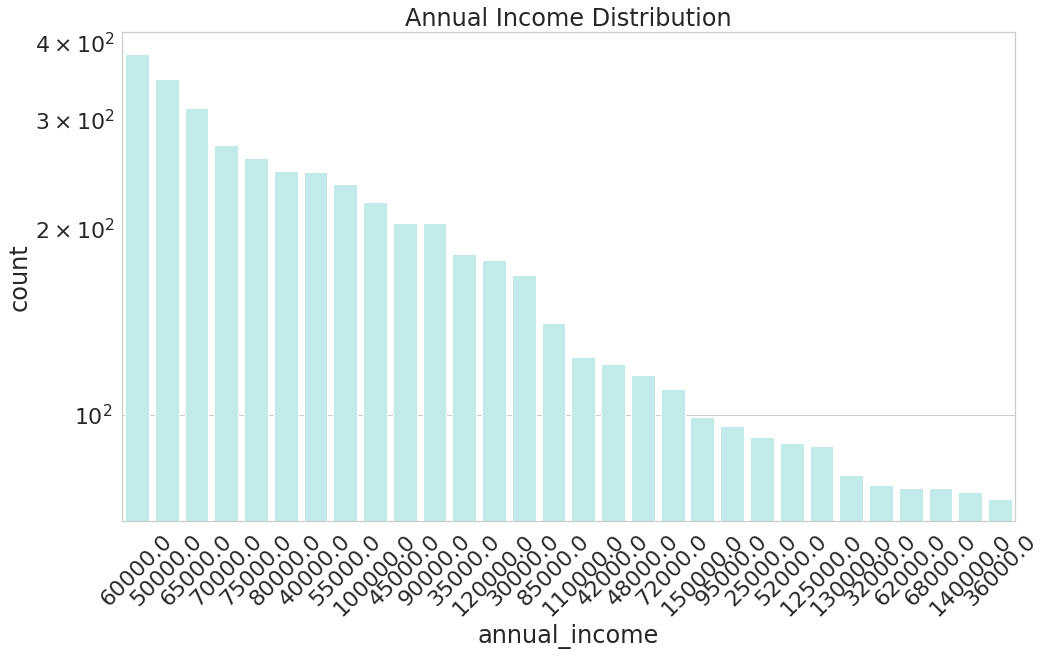

In [20]:
# customer profile - income

field = 'annual_income'
basic(field = field)

# plot to see distribution

plt.rcParams["figure.figsize"] = [16,9]
sns.set(font_scale = 2, style='whitegrid')

colors = sns.color_palette('pastel')[9]

plot = sns.countplot(x=field, 
                     data=data, 
                     order=data[field].value_counts().iloc[:30].index, 
                     color=colors)

plot.set_yscale('log')

plot.set_title('Annual Income Distribution')

plot.set_xticklabels(plot.get_xticklabels(),rotation=45)



'# of Zeros:'

0

'Uniqueness:'

array(['MORTGAGE', 'RENT', 'OWN'], dtype=object)

'# of Unique:'

3

'value counts:'

MORTGAGE    4789
RENT        3858
OWN         1353
Name: homeownership, dtype: int64

'# of Records'

10000

[Text(0, 0, 'MORTGAGE'), Text(1, 0, 'RENT'), Text(2, 0, 'OWN')]

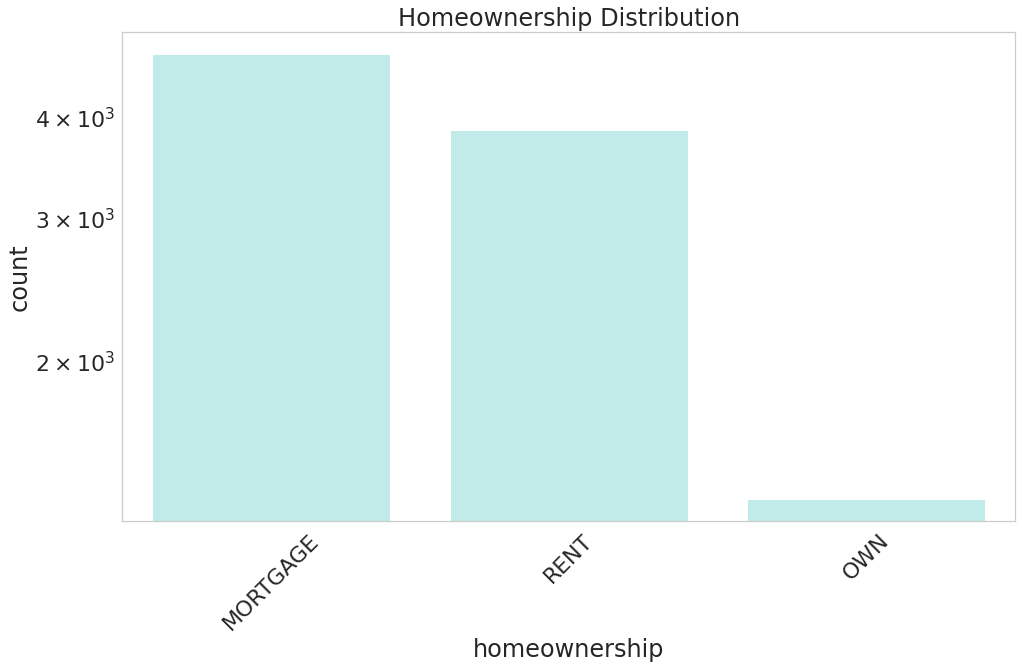

In [21]:
# customer profile - homeownship

field = 'homeownership'
basic(field = field)

# plot to see distribution

plt.rcParams["figure.figsize"] = [16,9]
sns.set(font_scale = 2, style='whitegrid')

colors = sns.color_palette('pastel')[9]

plot = sns.countplot(x=field, 
                     data=data, 
                     order=data[field].value_counts().iloc[:30].index, 
                     color=colors)

plot.set_yscale('log')

plot.set_title('Homeownership Distribution')

plot.set_xticklabels(plot.get_xticklabels(),rotation=45)

'# of Zeros:'

0

'Uniqueness:'

array([1.801e+01, 5.040e+00, 2.115e+01, ..., 4.000e-02, 3.238e+01,
       4.526e+01])

'# of Unique:'

3673

'value counts:'

19.362537    52
16.110000    14
19.420000    12
13.200000    12
20.660000    12
             ..
42.990000     1
89.880000     1
38.390000     1
29.820000     1
39.930000     1
Name: debt_to_income, Length: 3673, dtype: int64

'# of Records'

10000

[Text(0, 0, '19.362537193405707'),
 Text(1, 0, '16.11'),
 Text(2, 0, '19.42'),
 Text(3, 0, '13.2'),
 Text(4, 0, '20.66'),
 Text(5, 0, '16.5'),
 Text(6, 0, '15.84'),
 Text(7, 0, '12.91'),
 Text(8, 0, '8.83'),
 Text(9, 0, '20.48'),
 Text(10, 0, '17.08'),
 Text(11, 0, '12.13'),
 Text(12, 0, '21.6'),
 Text(13, 0, '17.35'),
 Text(14, 0, '14.2'),
 Text(15, 0, '21.05'),
 Text(16, 0, '18.8'),
 Text(17, 0, '16.44'),
 Text(18, 0, '15.71'),
 Text(19, 0, '17.96'),
 Text(20, 0, '13.08'),
 Text(21, 0, '12.58'),
 Text(22, 0, '11.63'),
 Text(23, 0, '14.4'),
 Text(24, 0, '18.36'),
 Text(25, 0, '18.92'),
 Text(26, 0, '19.44'),
 Text(27, 0, '20.16'),
 Text(28, 0, '15.23'),
 Text(29, 0, '14.6')]

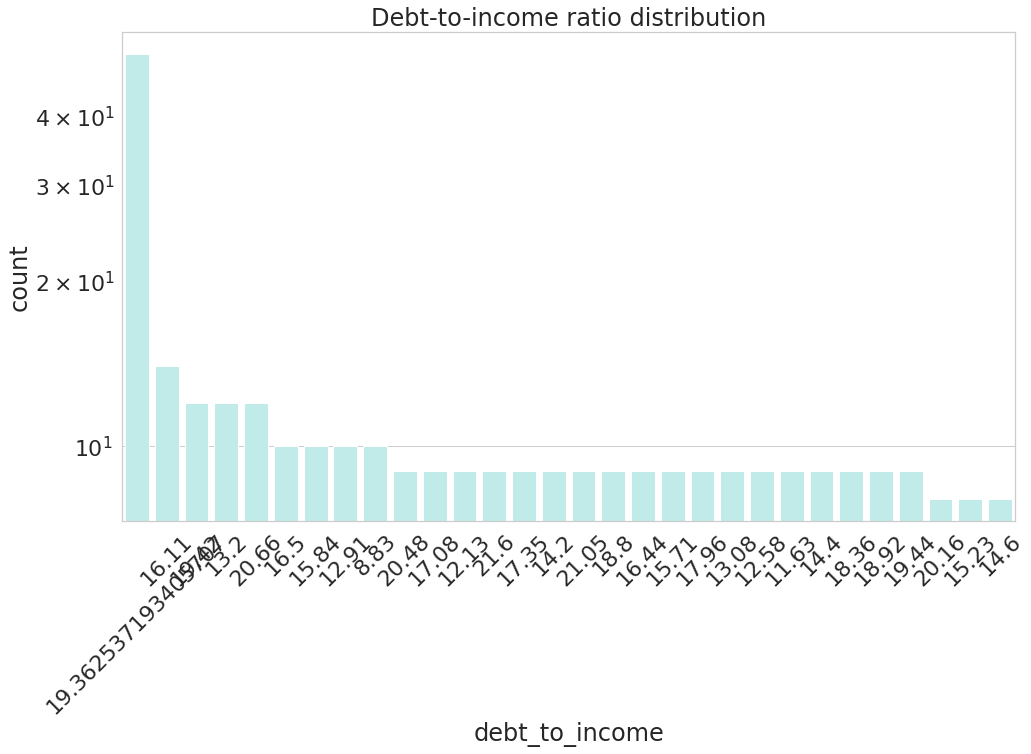

In [22]:
# customer profile - debt to income ratio

field = 'debt_to_income'
basic(field = field)

# plot to see distribution

plt.rcParams["figure.figsize"] = [16,9]
sns.set(font_scale = 2, style='whitegrid')

colors = sns.color_palette('pastel')[9]

plot = sns.countplot(x=field, 
                     data=data, 
                     order=data[field].value_counts().iloc[:30].index, 
                     color=colors)

plot.set_yscale('log')

plot.set_title('Debt-to-income ratio distribution')

plot.set_xticklabels(plot.get_xticklabels(),rotation=45)

Customer Profile: 
Most of our loan applicants are having a mortgage or renting homes. Their income distribution is significantly skewed, and most annual incomes are between 55000 - 700000. Consequently, the debt_to_income ratio also has a skewed distribution, most of the debt_to_income ratios fall between 12 to 16. 

'# of Zeros:'

0

'Uniqueness:'

array(['C', 'D', 'A', 'B', 'F', 'E', 'G'], dtype=object)

'# of Unique:'

7

'value counts:'

B    3037
C    2653
A    2459
D    1446
E     335
F      58
G      12
Name: grade, dtype: int64

'# of Records'

10000

[Text(0, 0, 'B'),
 Text(1, 0, 'C'),
 Text(2, 0, 'A'),
 Text(3, 0, 'D'),
 Text(4, 0, 'E'),
 Text(5, 0, 'F'),
 Text(6, 0, 'G')]

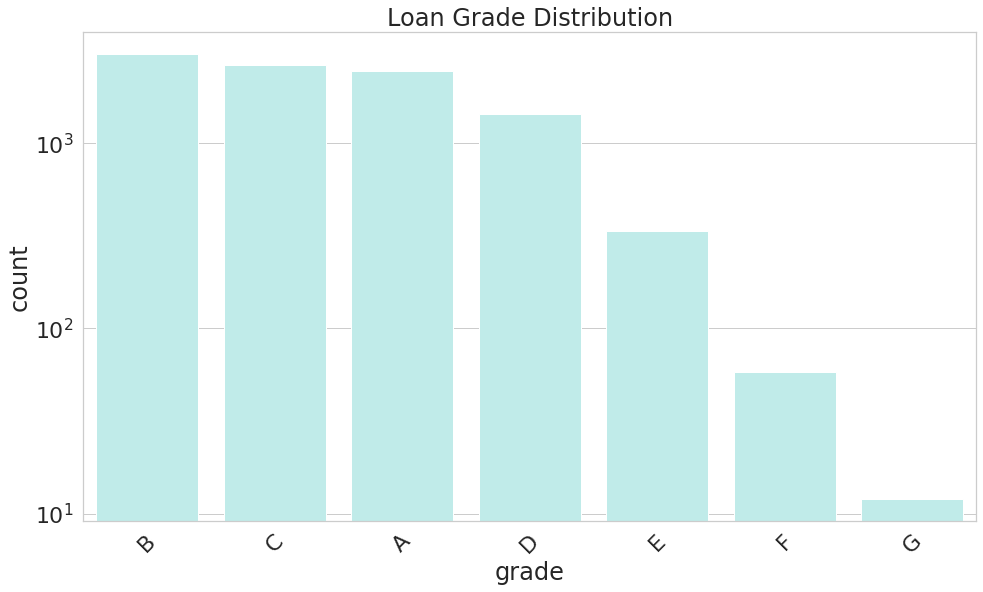

In [23]:
# risk analysis - loan grade 

field = 'grade'
basic(field = field)

# plot to see distribution

plt.rcParams["figure.figsize"] = [16,9]
sns.set(font_scale = 2, style='whitegrid')

colors = sns.color_palette('pastel')[9]

plot = sns.countplot(x=field, 
                     data=data, 
                     order=data[field].value_counts().iloc[:30].index, 
                     color=colors)

plot.set_yscale('log')

plot.set_title('Loan Grade Distribution')

plot.set_xticklabels(plot.get_xticklabels(),rotation=45)

'# of Zeros:'

0

'Uniqueness:'

array([ 0,  1,  3,  2,  4,  7,  5, 52,  6])

'# of Unique:'

9

'value counts:'

0     8586
1     1288
2       78
3       27
4       12
5        4
6        2
7        2
52       1
Name: num_historical_failed_to_pay, dtype: int64

'# of Records'

10000

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '52')]

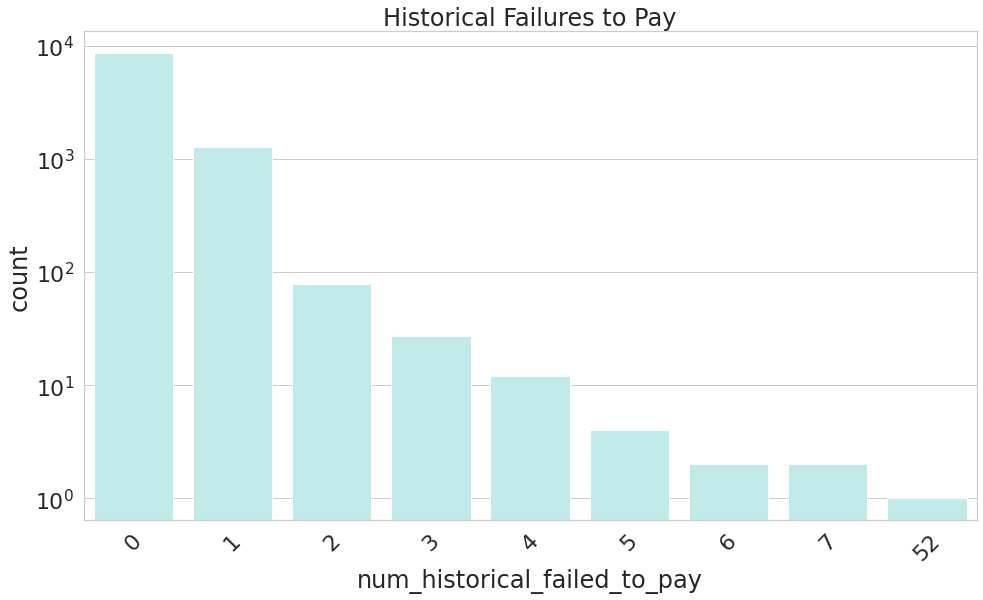

In [24]:
# risk analysis - historical failure to pay

field = 'num_historical_failed_to_pay'
basic(field = field)

# plot to see distribution

plt.rcParams["figure.figsize"] = [16,9]
sns.set(font_scale = 2, style='whitegrid')

colors = sns.color_palette('pastel')[9]

plot = sns.countplot(x=field, 
                     data=data, 
                     order=data[field].value_counts().iloc[:30].index, 
                     color=colors)

plot.set_yscale('log')

plot.set_title('Historical Failures to Pay')

plot.set_xticklabels(plot.get_xticklabels(),rotation=45)

'# of Zeros:'

0

'Uniqueness:'

array([0, 1])

'# of Unique:'

2

'value counts:'

0    9999
1       1
Name: current_accounts_delinq, dtype: int64

'# of Records'

10000

[Text(0, 0, '0'), Text(1, 0, '1')]

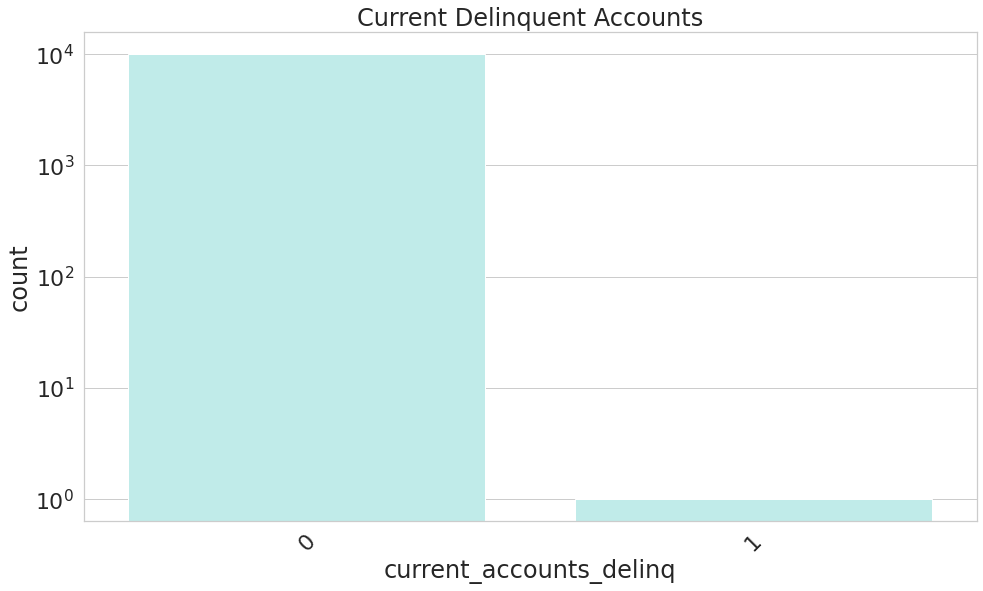

In [25]:
# risk analysis - delinquent accounts

field = 'current_accounts_delinq'
basic(field = field)

# plot to see distribution

plt.rcParams["figure.figsize"] = [16,9]
sns.set(font_scale = 2, style='whitegrid')

colors = sns.color_palette('pastel')[9]

plot = sns.countplot(x=field, 
                     data=data, 
                     order=data[field].value_counts().iloc[:30].index, 
                     color=colors)

plot.set_yscale('log')

plot.set_title('Current Delinquent Accounts')

plot.set_xticklabels(plot.get_xticklabels(),rotation=45)

Risk analysis 
Viewing from the behavior of our customers, the majority of them don't have any delinquent accounts or historical failure to pay. Most historical failures to pay are concentrated between 1 to 3 times. Meanwhile, most of the loans' grades are B, A, C. These 2 factors indicate that we can have an optimistic assumption - the risk of failing to pay back is relatively low. 
To identify risk, especially quantitatively predict the risk and paid-interest, we need to consider many other factors, which will be further explored in models. 

Modeling: as paid_interest rate is what we will predict, that means paid_interest is the dependent variable. With dependent variable, we will build supervised models, 2 models we suggest here are neural network and random forest as they tend to be both accurate and explainable. To build models, we need to conduct feature selection to see which factors we will include in the models. 

In [26]:
# prep data, convert data types

def str_to_digit(df, col):
    map_dict = {}
    count = 1
    for value in df[col].unique():
        map_dict[value] = count
        count += 1
    return df[col].map(map_dict)

remove_cols = ["emp_title", "state", "num_accounts_120d_past_due", "issue_month", "paid_interest"]
for col in data.columns:
    if col not in remove_cols and data[col].dtypes == "O":
        data[col] = str_to_digit(data, col)

data["loan_year_digit"] = data["issue_month"].dt.year
data["loan_month_digit"] = data["issue_month"].dt.month

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


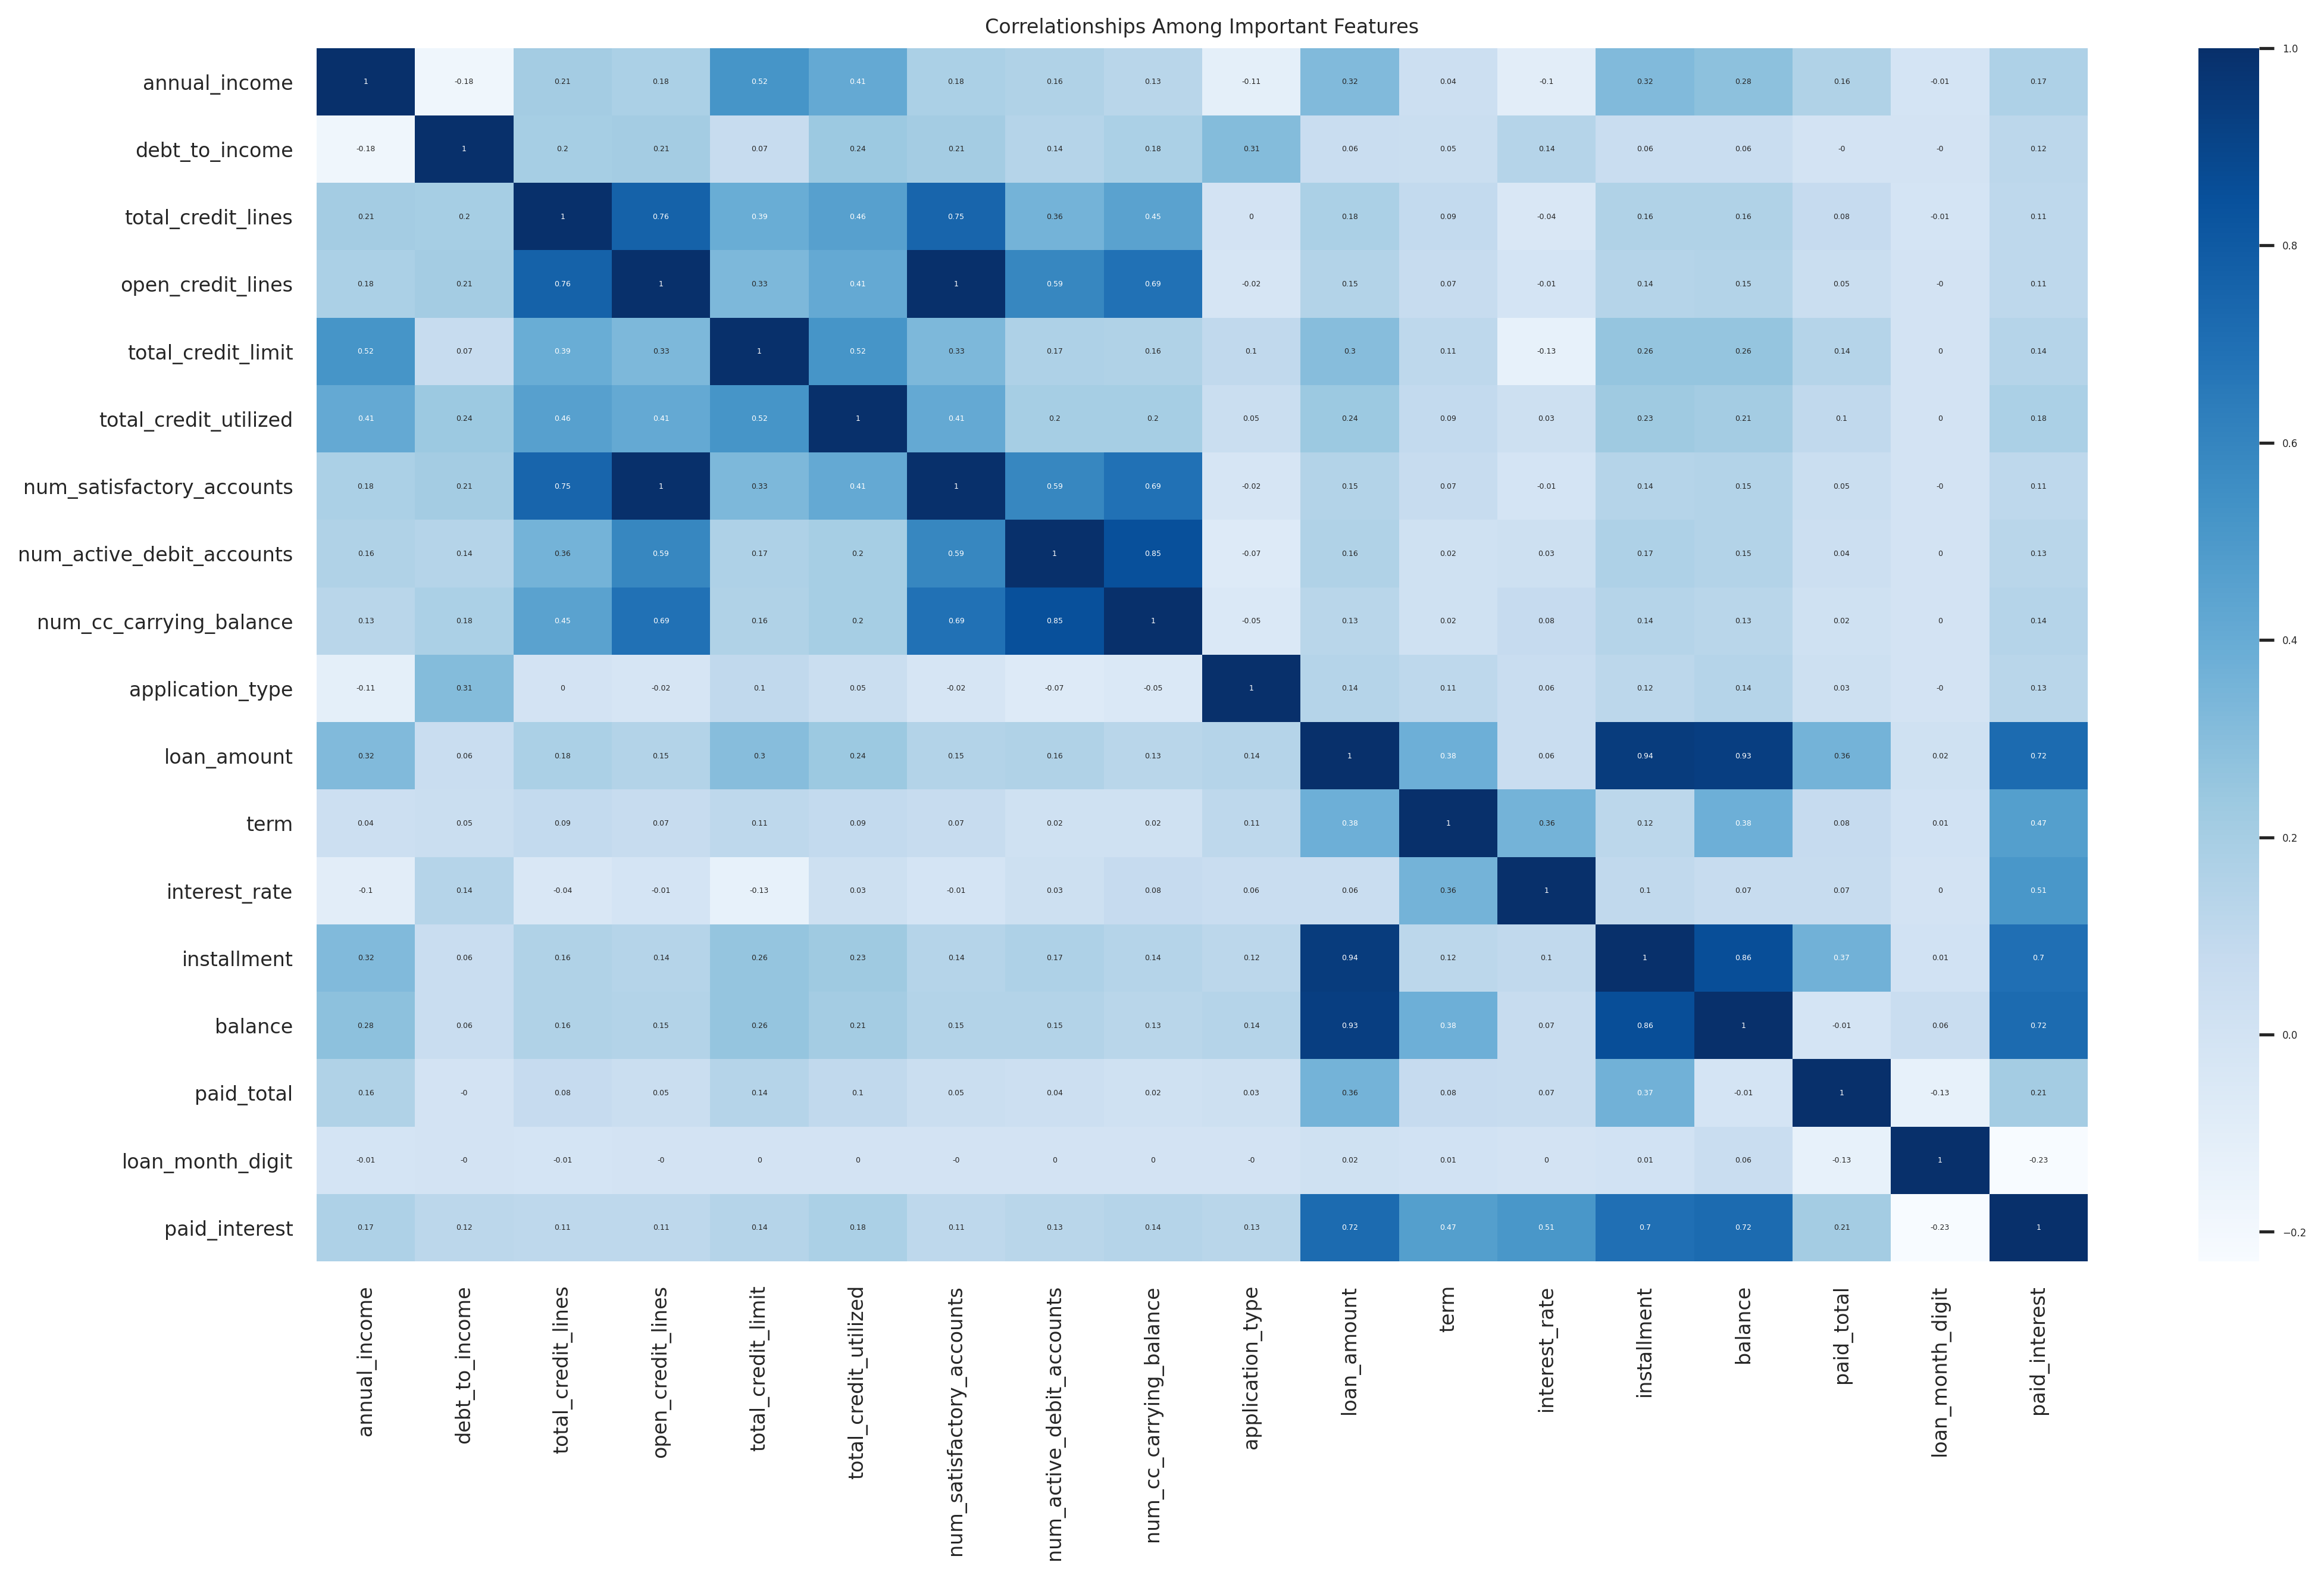

In [27]:
# Feature Selection

select_features = []

for col in data.columns:
    if col not in remove_cols:
        corr, p_value = stats.pearsonr(data[col], data['paid_interest'])
        if abs(corr) > 0.1 and p_value < 0.001:
            select_features.append(col)

select_data = data[select_features + ["paid_interest"]]

plt.figure(figsize=(16, 9), dpi=300)
plt.tick_params(labelsize=8)
plt.title("Correlationships Among Important Features",fontsize=8)
sns.heatmap(round(select_data.corr(), 2), annot=True, cmap="Blues", annot_kws={"fontsize":3})
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=4)
plt.show()

In [28]:
# Split train/test dataset

X, y = select_data.iloc[:,:-1], select_data["paid_interest"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [29]:
# Decision Tree
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
tree_rmse = np.sqrt(mse(y_pred, y_test))
tree_mae = mae(y_pred, y_test)

# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf_rmse = np.sqrt(mse(y_pred, y_test))
rf_mae = mae(y_pred, y_test)

# Results & Measure of Goodness
result = pd.DataFrame({
    "Model": ["DecisionTree", "RandomForest"],
    "RMSE": [tree_rmse, rf_rmse],
    "MAE": [tree_mae, rf_mae]
})

result

,Model,RMSE,MAE
0,DecisionTree,125.887098,48.091160
1,RandomForest,88.461261,31.467882


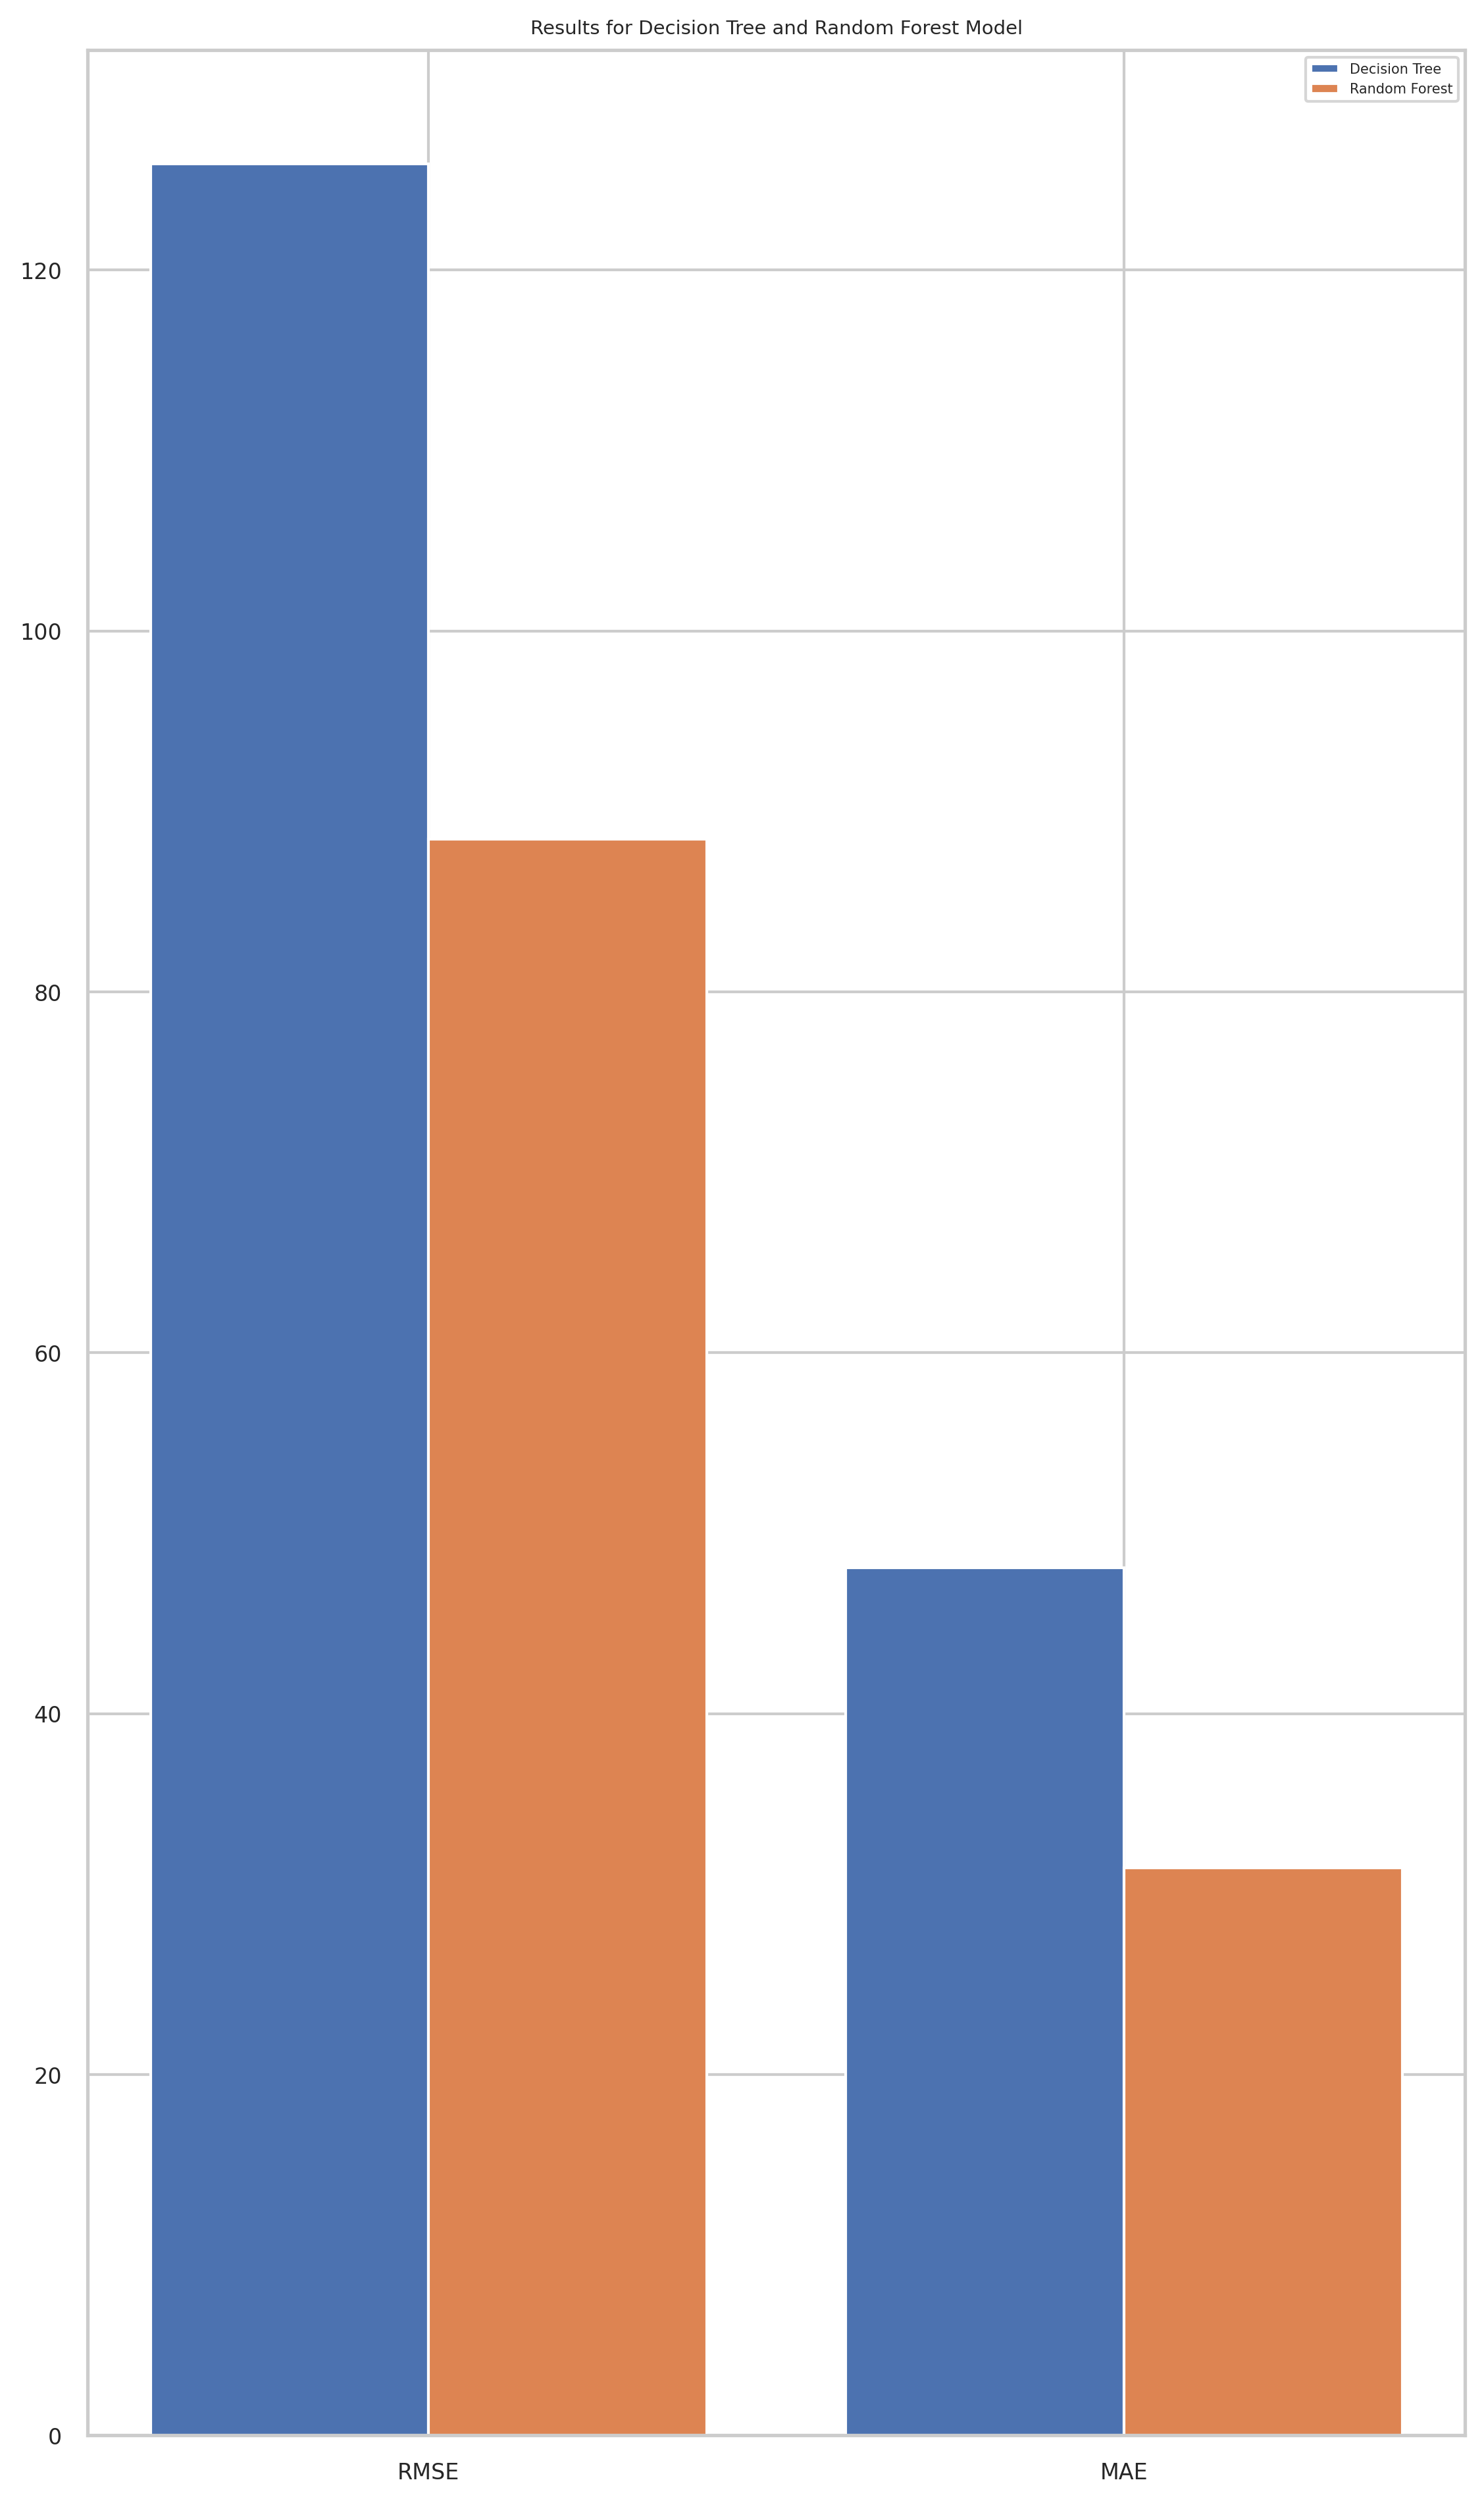

In [30]:
# Visualise the results

plt.figure(figsize=(9, 16), dpi=300)
plt.tick_params(labelsize=8)
plt.bar([0.8, 1.8], [tree_rmse, tree_mae], width=0.4, label="Decision Tree")
plt.bar([1.2, 2.2], [rf_rmse, rf_mae], width=0.4, label="Random Forest")
plt.title("Results for Decision Tree and Random Forest Model",fontsize=7)
plt.xticks([1,2], ["RMSE", "MAE"])
plt.legend(fontsize=5)
plt.show()